# 1. Загрузка датасета

In [2]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz

# Загрузка датасета
url = 'https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv'
data = pd.read_csv(url)

# Просмотр первых строк данных
print(data.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


# 2. Предварительный анализ данных

In [5]:
# Информация о датасете
print(data.info())

# Проверка на наличие пропусков
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


Столбцы:

age — возраст (числовая переменная),

sex — пол (категориальная переменная),

bmi — индекс массы тела (числовая переменная),

children — количество детей (числовая переменная),

smoker — курит ли человек (категориальная переменная),

region — регион проживания (категориальная переменная),

charges — стоимость страховки (числовая переменная).

# 3. Статистический анализ

Проведем статистический анализ данных, чтобы лучше понять распределение переменных.

In [10]:
# Описательная статистика для числовых переменных
print(data.describe())

# Распределение категориальных переменных
print(data['sex'].value_counts())
print(data['smoker'].value_counts())
print(data['region'].value_counts())

               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010
sex
male      676
female    662
Name: count, dtype: int64
smoker
no     1064
yes     274
Name: count, dtype: int64
region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64


# 4. Преобразование категориальных переменных в числовые


In [13]:
from sklearn.preprocessing import LabelEncoder

# Преобразование категориальных переменных в числовые
le = LabelEncoder()
data['sex'] = le.fit_transform(data['sex'])   # Преобразование 'sex' в числовые значения
data['smoker'] = le.fit_transform(data['smoker'])   # Преобразование 'smoker' в числовые значения
data['region'] = le.fit_transform(data['region'])   # Преобразование 'region' в числовые значения

# 5. Тепловая карта

Добавление тепловой карты корреляций — это отличный способ визуализировать взаимосвязи между переменными и выбрать наиболее значимые для регрессии.

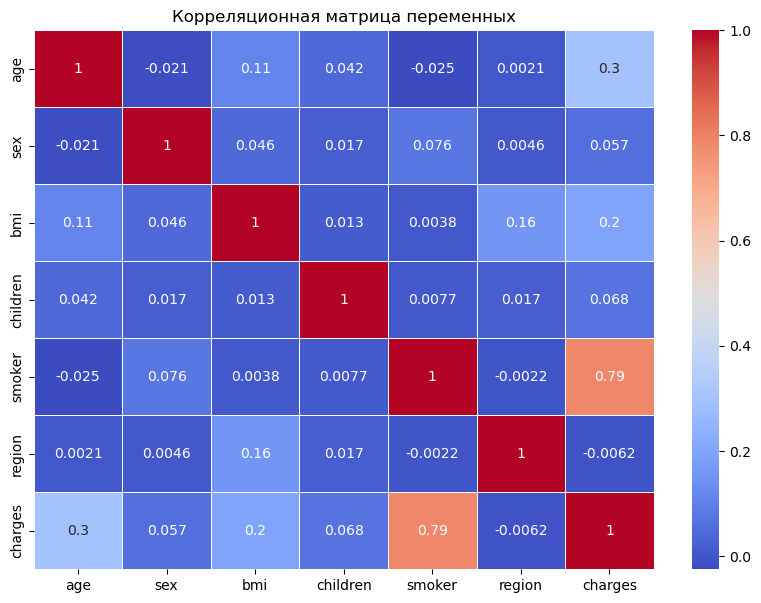

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Построение корреляционной матрицы
corr_matrix = data.corr()

# Построение тепловой карты
plt.figure(figsize=(10,7))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Корреляционная матрица переменных')
plt.show()

# 6. Регрессия 

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score

# Выбор переменных для регрессии
X = data[['age', 'bmi', 'smoker']]  # На основе анализа тепловой карты
y = data['charges']  # Целевая переменная

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание модели линейной регрессии
model = LinearRegression()
model.fit(X_train, y_train)

# Оценка модели
y_pred = model.predict(X_test)

# Коэффициенты регрессии
print(f'Коэффициенты регрессии: {model.coef_}')
print(f'Свободный член: {model.intercept_}')

# Оценка точности модели
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Среднеквадратичная ошибка: {mse}')
print(f'Коэффициент детерминации (R^2): {r2}')

Коэффициенты регрессии: [  259.41020462   326.45023215 23675.37184666]
Свободный член: -11707.802334583123
Среднеквадратичная ошибка: 34512843.8802279
Коэффициент детерминации (R^2): 0.7776932310583374


# 7. График фактических vs. предсказанных значений

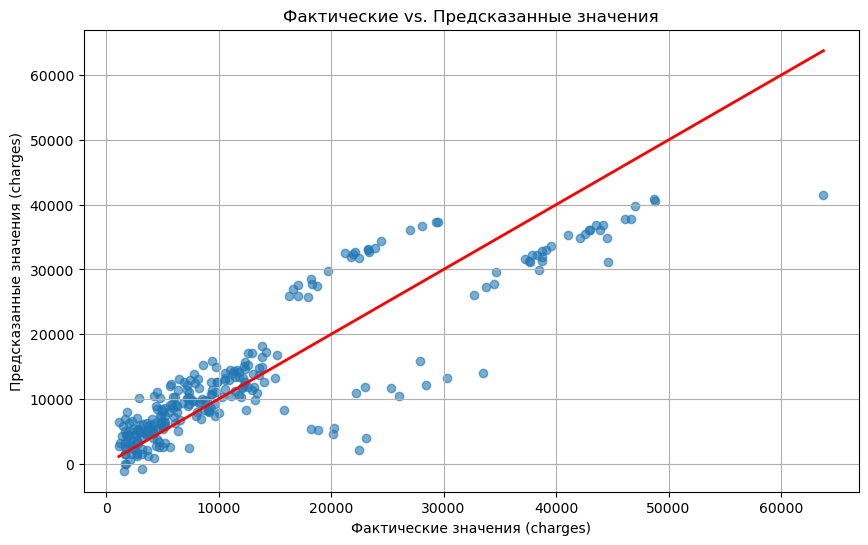

In [23]:
import matplotlib.pyplot as plt

# График фактических vs. предсказанных значений
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)  # Линия y=x
plt.title('Фактические vs. Предсказанные значения')
plt.xlabel('Фактические значения (charges)')
plt.ylabel('Предсказанные значения (charges)')
plt.grid(True)
plt.show()

Данные сосредоточены около прямой y=x, что говорит о неплохой точности построенной модели.

# 8. Кластеризация

In [27]:
from sklearn.cluster import KMeans

# Определение числа кластеров
n_clusters = 3  # Количество кластеров
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
data['cluster'] = kmeans.fit_predict(X)  # Применение K-means к выборке

# Вывод центров кластеров
centers = kmeans.cluster_centers_
print(f'Центры кластеров:\n{centers}')

Центры кластеров:
[[40.62383178 30.47182243  0.22429907]
 [23.82186235 29.89673077  0.21255061]
 [56.01923077 31.77091346  0.17548077]]


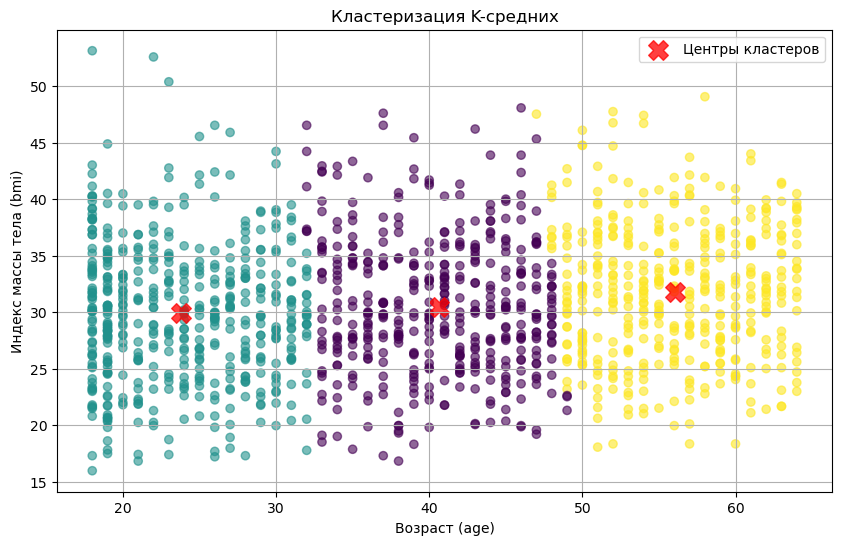

In [29]:
# Визуализация кластеров
plt.figure(figsize=(10, 6))
plt.scatter(data['age'], data['bmi'], c=data['cluster'], cmap='viridis', alpha=0.6)
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X', label='Центры кластеров')  # Центры кластеров
plt.title('Кластеризация K-средних')
plt.xlabel('Возраст (age)')
plt.ylabel('Индекс массы тела (bmi)')
plt.legend()
plt.grid(True)
plt.show()

Кластеризация предоставила возможность разделить наблюдения на группы, которые можно дополнительно исследовать и использовать для практических приложений в области страхования и медицины. Для более глубокого анализа можно рассмотреть дополнительные переменные и методы кластеризации.

# 9. Создание и визуализация дерева решений

In [35]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

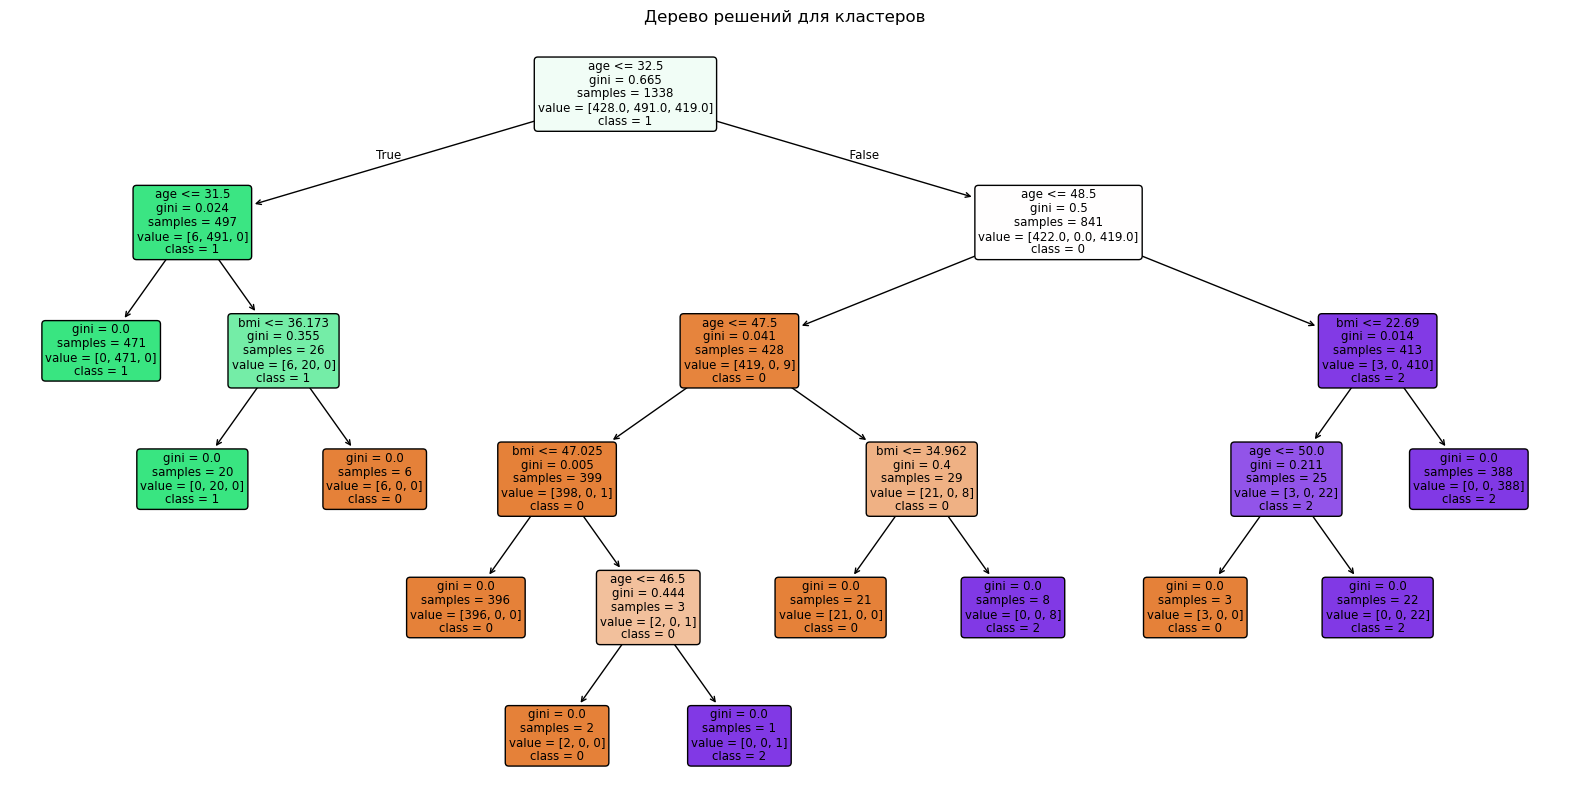

In [37]:
# 1. Создание и обучение дерева решений
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X, data['cluster'])

# 2. Визуализация дерева решений
plt.figure(figsize=(20, 10))
plot_tree(decision_tree, feature_names=X.columns, class_names=[str(i) for i in range(n_clusters)], filled=True, rounded=True)
plt.title("Дерево решений для кластеров")
plt.show()

Построенное дерево решений помогает визуализировать ключевые факторы, определяющие разделение данных на кластеры. На каждом уровне дерево показывает, какой признак наиболее значим для разделения кластеров.

В частности, анализ узлов дерева показывает, что возраст и статус курения играют важную роль в формировании групп. Это позволяет сделать вывод, что эти признаки существенно влияют на различия между кластерами, выявляя группы клиентов с более высокими и низкими страховыми расходами.

Таким образом, дерево решений не только подтверждает результаты кластеризации, но и упрощает интерпретацию, показывая, какие именно характеристики можно использовать для прогнозирования принадлежности к тому или иному кластеру.

# 10. Выводы по проекту

В данном проекте был проведен комплексный анализ данных о страховых выплатах с использованием линейной регрессии и кластеризации.
    
Основные этапы работы включали в себя:

– Предобработка данных:

– Построена корреляционная матрица, что позволило визуализировать взаимосвязи между переменными. Определено, что переменные age, bmi и smoker имеют наиболее сильную корреляцию с целевой переменной charges;

– Создана модель линейной регрессии для предсказания страховых выплат. Результаты показали, что модель имеет разумную точность, о чем свидетельствуют значения среднеквадратичной ошибки и коэффициента детерминации (R²);

– Выполнена кластеризация данных с использованием алгоритма K-средних. Выявленные кластеры могут быть полезны для страховых компаний.